<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_2_with_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
housing_df=pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: >

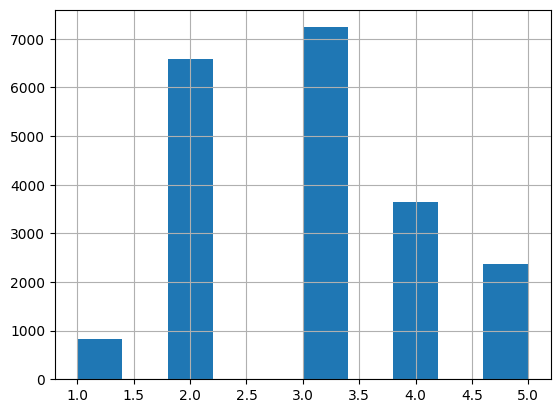

In [ ]:
housing_df["income_cat"]=pd.cut(housing_df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing_df["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)

for train_index,test_index in split.split(housing_df,housing_df["income_cat"]):
  stratified_train_set=housing_df.loc[train_index]
  stratified_test_set=housing_df.loc[test_index]

In [ ]:
stratified_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,2


In [ ]:
stratified_test_set.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,39
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
X_train=stratified_train_set.drop('median_house_value',axis=1)
Y_train=stratified_train_set['median_house_value']

X_test=stratified_test_set.drop('median_house_value',axis=1)
Y_test=stratified_test_set['median_house_value']

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class new_class(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedroom_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedroom_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_features = [col for col in X_train.columns if col != "ocean_proximity"]
categorical_features = ["ocean_proximity"]

In [ ]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('new_attribute_adder',new_class()),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# **Using Linear Regression Model**

In [ ]:
model = LinearRegression()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

full_pipeline.fit(X_train, Y_train)

y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test case: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train case: {rmse_train}")

Root Mean Squared Error (RMSE) for test case: 68375.84360178528
Root Mean Squared Error (RMSE) for train case: 67999.14251633974


# **Using Decision Tree Model**

In [ ]:
model = DecisionTreeRegressor()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

full_pipeline.fit(X_train, Y_train)

y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test case: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train case: {rmse_train}")

Root Mean Squared Error (RMSE) for test case: 70804.1632763108
Root Mean Squared Error (RMSE) for train case: 0.0


# **Using Random Forest Model**

In [ ]:
model = RandomForestRegressor()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

full_pipeline.fit(X_train, Y_train)

y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test case: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train case: {rmse_train}")

Root Mean Squared Error (RMSE) for test case: 50115.90524433189
Root Mean Squared Error (RMSE) for train case: 18660.64549913008


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50), max_iter=500, random_state=42)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

full_pipeline.fit(X_train, Y_train)

y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test case: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train case: {rmse_train}")

Root Mean Squared Error (RMSE) for test case: 52793.38486547686
Root Mean Squared Error (RMSE) for train case: 45605.27463736169


# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestRegressor()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

CV_scores=cross_val_score(full_pipeline,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
cv_rmse=np.sqrt(-CV_scores)
print(f"Cross-Validation RMSE: {cv_rmse}")
print(f"Mean CV RMSE: {cv_rmse.mean()}")
print(f"Standard Deviation of CV RMSE: {cv_rmse.std()}")

Cross-Validation RMSE: [51320.79085025 48266.43291208 51535.05125791 51046.25851193
 49128.53088135]
Mean CV RMSE: 50259.41288270622
Standard Deviation of CV RMSE: 1313.2985770813596


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestRegressor()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

param_grid = [
    {'classifier__n_estimators': [3, 10, 30], 'classifier__max_features': [2, 4, 6, 8]},
    {'classifier__bootstrap': [False], 'classifier__n_estimators': [3, 10], 'classifier__max_features': [2, 3, 4]},
]

grid_search=GridSearchCV(full_pipeline,param_grid,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
grid_search.fit(X_train,Y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'classifier__max_features': 8, 'classifier__n_estimators': 30}


In [ ]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('new_attribute_adder',
                                                                   new_class()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'income_cat']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('classifier',
                 RandomForestRegressor(max_features=8, n_estimators=30))])

In [ ]:
Y_test_predict=best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test set: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train set: {rmse_train}")

Root Mean Squared Error (RMSE) for test set: 52793.38486547686
Root Mean Squared Error (RMSE) for train set: 19270.774656872218


In [ ]:
from scipy.stats import norm

errors=Y_test-Y_test_predict
std_dev = np.std(errors, ddof=1)

n = len(Y_test)
margin_of_error = norm.ppf(0.975) * (std_dev / np.sqrt(n))

lower_bound = Y_test_predict - margin_of_error
upper_bound = Y_test_predict + margin_of_error

for i in range(5):  # Displaying first 5 results
    print(f"Predicted: {Y_test_predict[i]:.2f}, 95% CI: ({lower_bound[i]:.2f}, {upper_bound[i]:.2f})")

Predicted: 157710.00, 95% CI: (156167.55, 159252.45)
Predicted: 143793.33, 95% CI: (142250.89, 145335.78)
Predicted: 259640.00, 95% CI: (258097.55, 261182.45)
Predicted: 131740.00, 95% CI: (130197.55, 133282.45)
Predicted: 108926.67, 95% CI: (107384.22, 110469.11)


# **T Stastics of the RMSE of the model**

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (Y_test_predict - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([48326.52601197, 52721.74390171])

In [ ]:
cv_results=grid_search.cv_results_

for mean_scores,params in zip(cv_results["mean_test_score"],cv_results["params"]):
  print(f"Error: {np.sqrt(-mean_scores)} Params: {params}")

Error: 63796.04154776967 Params: {'classifier__max_features': 2, 'classifier__n_estimators': 3}
Error: 55657.9682438669 Params: {'classifier__max_features': 2, 'classifier__n_estimators': 10}
Error: 52983.52459892244 Params: {'classifier__max_features': 2, 'classifier__n_estimators': 30}
Error: 59515.0443264272 Params: {'classifier__max_features': 4, 'classifier__n_estimators': 3}
Error: 53101.02239224066 Params: {'classifier__max_features': 4, 'classifier__n_estimators': 10}
Error: 51176.53474371886 Params: {'classifier__max_features': 4, 'classifier__n_estimators': 30}
Error: 59877.92157649529 Params: {'classifier__max_features': 6, 'classifier__n_estimators': 3}
Error: 52770.07364344457 Params: {'classifier__max_features': 6, 'classifier__n_estimators': 10}
Error: 50813.73659755684 Params: {'classifier__max_features': 6, 'classifier__n_estimators': 30}
Error: 59624.42846134285 Params: {'classifier__max_features': 8, 'classifier__n_estimators': 3}
Error: 52604.57416035027 Params: {'c

# **XG Boost regressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

In [ ]:
model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    func=np.log1p,   # Apply log transformation (optional)
    inverse_func=np.expm1  # Convert back to original scale
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("classifier", model),  # Model step
])

full_pipeline.fit(X_train, Y_train)

y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test case: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train case: {rmse_train}")

Root Mean Squared Error (RMSE) for test case: 54555.16418225131
Root Mean Squared Error (RMSE) for train case: 52826.40156640621


In [ ]:
param_grid = {
    'classifier__regressor__n_estimators': [100, 300, 500],
    'classifier__regressor__learning_rate': [0.01, 0.05],
    'classifier__regressor__max_depth': [3, 5],
}


grid_XGB_regressor=GridSearchCV(full_pipeline,param_grid,cv=5,scoring='neg_mean_squared_error')

In [ ]:
grid_XGB_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('new_attribute_adder',
                                                                                          new_class()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income',
                                                                          'incom...
                                                                                          max_leaves=None,
                                                                                          min_child_weight=None,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=100,
                                                                                          n_jobs=None,
                                                                                          num_parallel_tree=None,
                                                                                          random_state=42, ...)))]),
             param_grid={'classifier__regressor__learning_rate': [0.01, 0.05],
                         'classifier__regressor__max_depth': [3, 5],
                         'classifier__regressor__n_estimators': [100, 300,
                                                                 500]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f"Best parameters: {grid_XGB_regressor.best_params_}")

Best parameters: {'classifier__regressor__learning_rate': 0.05, 'classifier__regressor__max_depth': 5, 'classifier__regressor__n_estimators': 500}


In [ ]:
best_model = grid_XGB_regressor.best_estimator_
y_test_pred = best_model.predict(X_test)
y_train_pred=best_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
print(f"Best Model RMSE on Test Data: {rmse_test}")
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
print(f"Best Model RMSE on Train Data: {rmse_train}")

Best Model RMSE on Test Data: 47843.773608228366
Best Model RMSE on Train Data: 36873.60350746514


# **Stacking**

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,max_features=8, max_depth=5, random_state=42)
neural_network = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50), max_iter=500, random_state=42)
meta_model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    func=np.log1p,   # Apply log transformation (optional)
    inverse_func=np.expm1  # Convert back to original scale
)

In [ ]:
stacking_model=StackingRegressor(estimators=[
    ('random_forest',random_forest),
    ('neural_network',neural_network),
],
final_estimator=meta_model)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step
    ("stacking_model", stacking_model)  # Stacking model
])

In [ ]:
# Fit pipeline on training data
full_pipeline.fit(X_train, Y_train)

# Predictions
y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

# Compute RMSE
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) for test data: {rmse_test}")
print(f"Root Mean Squared Error (RMSE) for train data: {rmse_train}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Root Mean Squared Error (RMSE) for test data: 52667.25502533413
Root Mean Squared Error (RMSE) for train data: 46689.73870657867
